In [1]:
from pathlib import Path
import numpy as np
import os
from torchinfo import summary
import PIL
import IPython
from IPython.display import Video
import shutil
from multiprocessing import Pool
from utils import 
# from importlib import reload
# reload(utils)

#model_name = "david_vaughan"
model_name = "monet"
model_name = "mosaic"

model = load_model(model_name)
#summary(model)

In [2]:
images_path = Path("./inputs/")

# Just test one...
image_name =  "bbb-161.png"
image_path = images_path / image_name
image = load_image(image_path)
out_image = process_image(image, model)
PIL.Image.fromarray(out_image).save("./out.png")

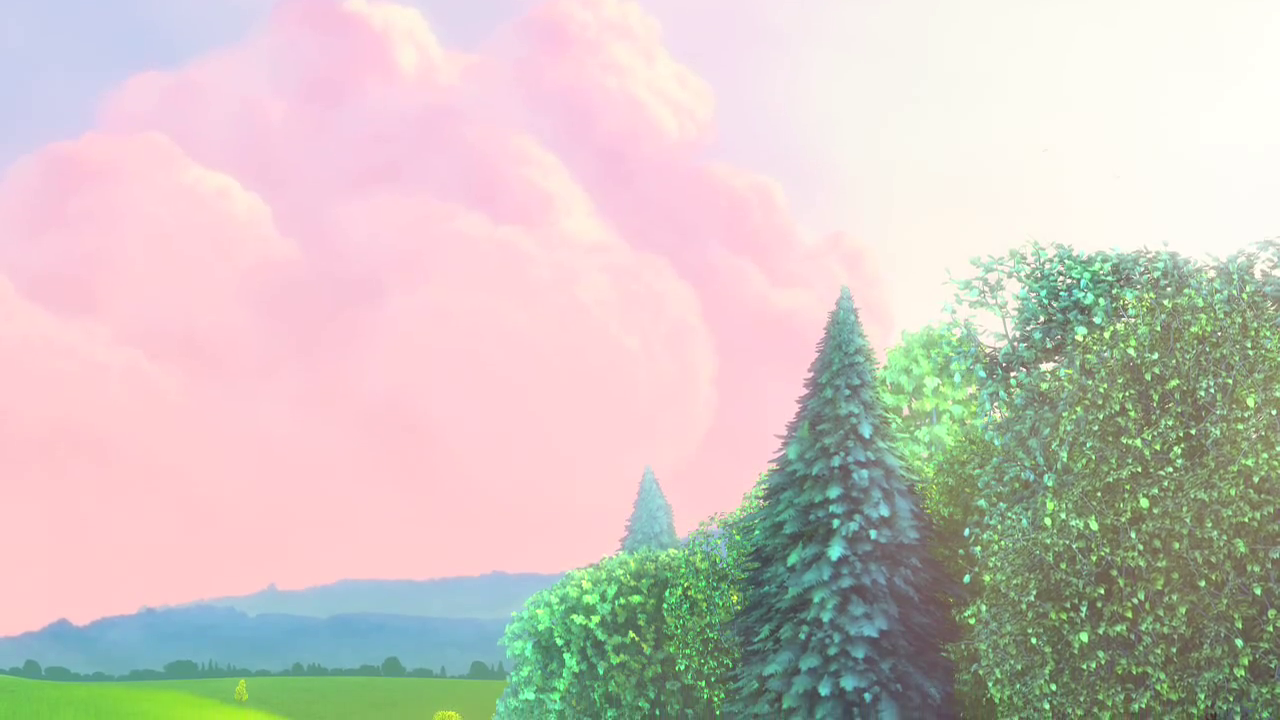

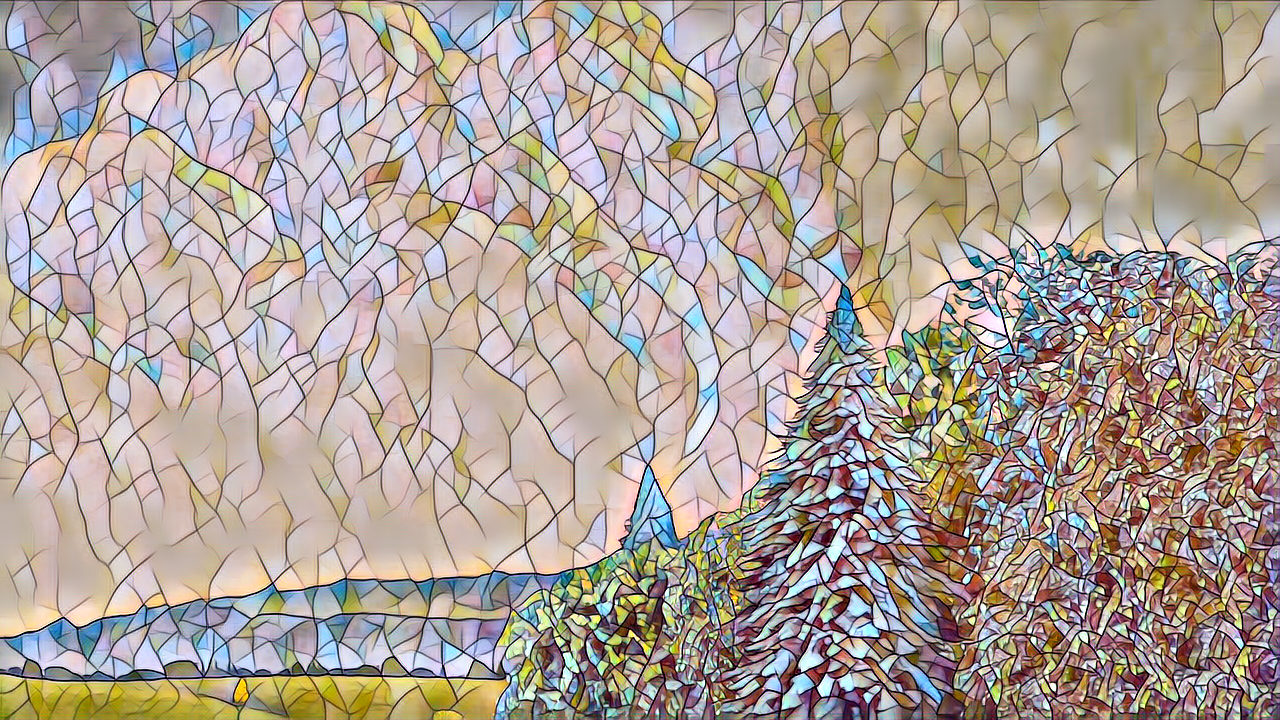

In [3]:
img_in = PIL.Image.fromarray(image)
img_out = PIL.Image.fromarray(out_image)
display(img_in, img_out)

In [33]:
# Load all frames (should be done with a DataLoader!)
in_frames = load_images()

In [34]:
# Process all frames - this would (should) be single thread.
out_frames =  [process_image(i) for i in in_frames]

In [45]:
# Save frames in /tmp (so we don't clog the storage network) as png 
shutil.rmtree("/tmp/openrtist_outputs", ignore_errors=True)
os.mkdir("/tmp/openrtist_outputs")

# pool = Pool(10)
# def save(i_f):
#     i, f = i_f
#     print("SAVE", i)
#     PIL.Image.fromarray(f).save(f"/tmp/openrtist_outputs/{i:04d}.png")

# pool.map(save, enumerate(out_frames))
    
for i,f in enumerate(out_frames):
    PIL.Image.fromarray(f).save(f"/tmp/openrtist_outputs/{i:04d}.png")

Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/util.py", line 224, in __call__
  File "/usr/lib/python3.9/multiprocessing/pool.py", line 729, in _terminate_pool
  File "/usr/lib/python3.9/multiprocessing/process.py", line 149, in join
  File "/usr/lib/python3.9/multiprocessing/popen_fork.py", line 43, in wait
  File "/usr/lib/python3.9/multiprocessing/popen_fork.py", line 27, in poll
KeyboardInterrupt: 


KeyboardInterrupt: 

In [36]:
!ffmpeg -y -framerate 30 -pattern_type glob -i '/tmp/openrtist_outputs/*.png' -c:v libx264 -pix_fmt yuv420p out.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [37]:
Video("out.mp4")